In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install opencv-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 11 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (26.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

In [2]:
import re
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [3]:
IMG_DIR = '/content/images/'

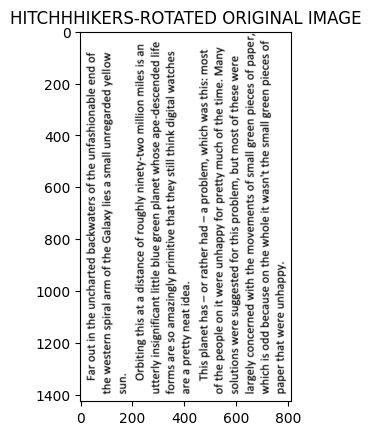

In [4]:
# Plot original image

image = cv2.imread(IMG_DIR + 'hitchhikers-rotated.png')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('HITCHHHIKERS-ROTATED ORIGINAL IMAGE')
plt.show()

In [5]:
# Menggunakan modul imutils untuk mempermudah operasi terkait gambar
import imutils

# Menggunakan pytesseract.image_to_osd() untuk mendapatkan informasi orientasi
results = pytesseract.image_to_osd(rgb_img, output_type=Output.DICT)

# Menampilkan informasi orientasi
print("Detected orientation: {}".format(
    results["orientation"]))

# Menampilkan informasi rotasi yang diperlukan untuk koreksi
print("Rotate by {} degrees to correct".format(
    results["rotate"]))

# Menampilkan informasi jenis skrip yang terdeteksi
print("Detected script: {}".format(results["script"]))

Detected orientation: 270
Rotate by 90 degrees to correct
Detected script: Latin


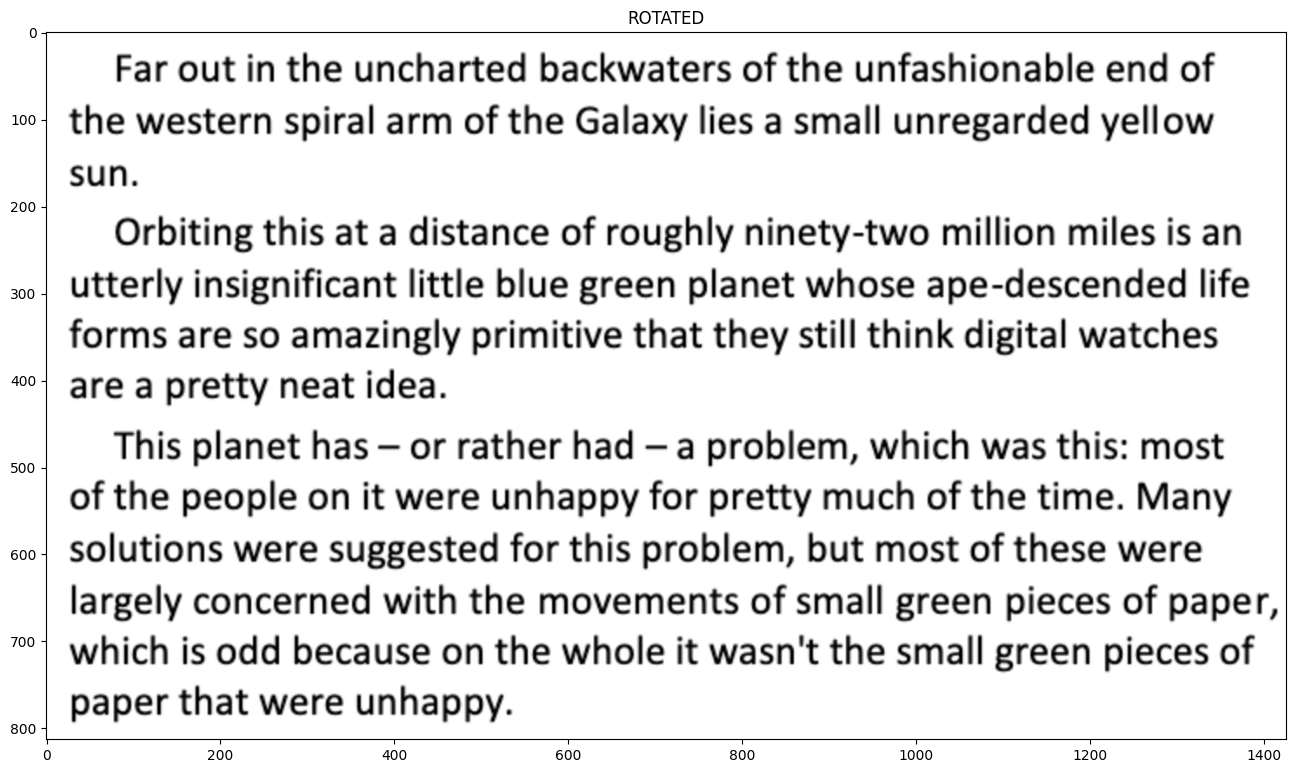

In [6]:
# Memutar gambar secara adaptif berdasarkan sudut rotasi yang diperlukan
rotated = imutils.rotate_bound(image, angle=results["rotate"])

# Menampilkan gambar yang telah diputar
plt.figure(figsize=(16, 12))
plt.imshow(rotated)
plt.title('ROTATED')
plt.show()

In [7]:
# Konfigurasi khusus dengan hanya bahasa Inggris yang diatur
custom_config = r'-l eng --oem 3 --psm 6'

# Menggunakan pytesseract.image_to_string() untuk mendapatkan teks dari gambar yang telah diputar
print(pytesseract.image_to_string(rotated, config=custom_config))

Far out in the uncharted backwaters of the unfashionable end of
the western spiral arm of the Galaxy lies a small unregarded yellow
sun.

Orbiting this at a distance of roughly ninety-two million miles is an
utterly insignificant little blue green planet whose ape-descended life
forms are so amazingly primitive that they still think digital watches
are a pretty neat idea.

This planet has — or rather had — a problem, which was this: most
of the people on it were unhappy for pretty much of the time. Many
solutions were suggested for this problem, but most of these were
largely concerned with the movements of small green pieces of paper,
which is odd because on the whole it wasn't the small green pieces of
paper that were unhappy.

